##Requirenements

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.7 MB/s et

##Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
# Load the dataset
resume_data = pd.read_csv("UpdatedResumeDataSet.csv")

resume_data.head()

##Explore data

In [ ]:
resume_data.columns

Index(['Category', 'Resume'], dtype='object')

In [ ]:
# Using shape attribute
num_rows, num_columns = resume_data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 962
Number of columns: 2


In [ ]:
unique_categories = resume_data['Category'].unique()
print("Unique categories:", unique_categories)


Unique categories: ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
num_unique_categories = resume_data['Category'].nunique()
print("Number of unique categories:", num_unique_categories)
print ("Displaying the distinct categories of resume:\n\n ")
print (resume_data['Category'].unique())


Number of unique categories: 25
Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resume_data['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


In [ ]:
resume_data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


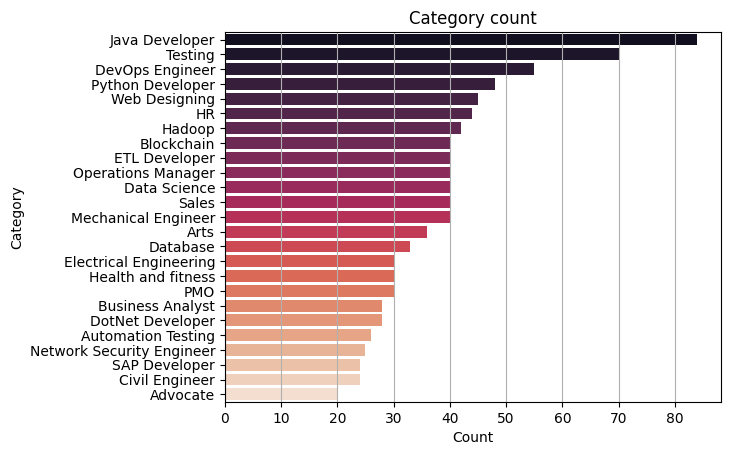

In [ ]:
import seaborn as sns
# Bar plot was made to see better numbers above
x_barplot = resume_data['Category'].value_counts().to_list()
y_barplot = resume_data['Category'].value_counts().index.to_list()

barplot_amount_values = sns.barplot(x=x_barplot,
                                    y=y_barplot,
                                    palette="rocket") # Color: https://seaborn.pydata.org/tutorial/color_palettes.html

plt.title('Category count')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(True, 'major', 'x')
plt.show()

In [ ]:
# Getting job that are tech area
list_tech = ['Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer',
             'Web Designing', 'ETL Developer', 'Data Science', 'SAP Developer',
             'Network Security Engineer', 'Automation Testing', 'DotNet Developer',
             'Hadoop', 'Database', 'Blockchain']

# Created a new column called 'Category Area', that identify if resume does part from certain category
resume_data['Category Area'] = None
resume_data['Category Area'] = resume_data['Category'].apply(lambda category: 'Tech' if category in list_tech else 'Others')
 #Sorting columns
resume_data = resume_data.reindex(columns=['Category', 'Category Area', 'Resume','cleaned_Resume'])
resume_data.head()

,Category,Category Area,Resume,cleaned_Resume
0,Data Science,Tech,Skills * Programming Languages: Python (pandas...,NaN
1,Data Science,Tech,Education Details \r\nMay 2013 to May 2017 B.E...,NaN
2,Data Science,Tech,"Areas of Interest Deep Learning, Control Syste...",NaN
3,Data Science,Tech,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,NaN
4,Data Science,Tech,"Education Details \r\n MCA YMCAUST, Faridab...",NaN


In [ ]:
import plotly.express as px
# Visualization of new columns
fig = px.pie(resume_data, names='Category Area', title='Data distribution',
             color_discrete_sequence=px.colors.qualitative.G10) # Color: https://plotly.com/python/discrete-color/

fig.update_layout(height=400, width=400)
fig.show()

In [ ]:
# Here was made a visualization more deeper, to see distribution of category area (tech or others)
resume_data_1 = resume_data[resume_data['Category Area'] == 'Tech']
resume_data_2 = resume_data[resume_data['Category Area'] == 'Others']

fig_1 = px.pie(resume_data_1, names='Category', title='Tech category distribution',
               color_discrete_sequence=px.colors.qualitative.D3) # Color: https://plotly.com/python/discrete-color/

fig_2 = px.pie(resume_data_2, names='Category', title='Others category distribution',
               color_discrete_sequence=px.colors.qualitative.D3)

fig_1.show()
print('')
fig_2.show()

In [ ]:
# Here we can see that resumes are duplicates
len_df = len(resume_data)
len_df_resume_uni = len(resume_data['Resume'].unique())
porc_no_duplicate = round(len_df_resume_uni/len_df, 2)

print(len_df, 'is the lenght of lines')
print(len_df_resume_uni, 'are uniques')
print(f'{porc_no_duplicate}% of data aren´t duplicates \n')

# The text has invalid char, then these invalid char can be present in others datas
resume_data['Resume'][3]

962 is the lenght of lines
166 are uniques
0.17% of data aren´t duplicates 



"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 months\r\nSQL- Exprience - Less than 1 year months\r\nDeep Learning- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year mo

In [ ]:
import time
# Insert this method to clear output when have finished
from IPython.display import clear_output

# Getting unique resumes
unique_resume = resume_data['Resume'].unique().tolist()

# Here it was done an exploration of resume, to find invalid chars
def resume_exp(unique_resume):
  num = 0
  for resume in unique_resume:
      print(num)
      print(resume)
      time.sleep(0.5) # Inserted this line, to try fix a error, basically sometimes output not appear
      inp = input()
      if inp == '':
          clear_output()
          num += 1
      else:
          clear_output()
          break

# Commented to not execute, uncomment to execute function
# resume_exp(unique_resume) # Insert any char to stop loop and press enter to continue

In [ ]:
import re
import string
# Invalid char collected, to take off
invalid_char = ['â¢', 'âª', 'â', 'ï', 'ï', 'ï·',
                'Â', 'Ã¼', 'Ã¼Â', 'Ã±', 'ÃÂ', '·', '*'] # '   ' whitespace

# This text below commeted, was my first attempt used in clean_resume function, however i found a best way such as '^\x00-\x7f]'
''' text = re.sub('â¢', ' ', text)
    text = re.sub('âª', ' ', text)
    text = re.sub('â', ' ', text)
    text = re.sub('Â', ' ', text)
    text = re.sub('Ã¼', ' ', text)
    text = re.sub('Ã¼Â', ' ', text)
    text = re.sub('Ã±', ' ', text)
    text = re.sub('ÃÂ', ' ', text)
    text = re.sub('ï', ' ', text)
    text = re.sub('ï', ' ', text)
    text = re.sub('ï·', ' ', text)'''

# Taking off invalid chars from resume
def clean_resume(text):
    text = re.sub('[^\x00-\x7f]', ' ', text)
    text = re.sub('\r', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s+', ' ', text) # Remove whitespace
    text = re.sub(('[%s]' % re.escape(string.punctuation)), ' ', text)

resume_data['Processed Resume'] = resume_data['Resume'].apply(lambda x: clean_resume(x))


In [ ]:
 import random
 #Here we got random numbers to verify random samples of resumes, to see if processing is correct
for _ in range(10):
  print(random.randint(0, len(resume_data)))

211
560
86
543
932
646
64
705
646
66


In [ ]:
random_number = 580
resume_data['Resume'][random_number]

'â\x80¢ Operating Systems: Windows â\x80¢ Others: MS Excel, MS Office, MS Power Point Key Projects Handled Project Title: fruit sorting and disease detection Client: Kranti Dynamics Team Size: 5 Education Details \r\nJanuary 2014 B.E. Electronics Mumbai, Maharashtra University of Mumbai\r\nPython Developer/analyst \r\n\r\npython developer and data analyst\r\nSkill Details \r\npython scripting,programming,developing- Exprience - 12 months\r\nfrontend  ,html- Exprience - 12 months\r\npython liabrary, numpy,pandas,matplolib,requests,beautiful soap- Exprience - 12 months\r\nmysql- Exprience - 12 months\r\ndjango- Exprience - 12 months\r\nweb scrapping- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Ace The Power of 5\r\ndescription - The Accountabilities:\r\n\r\nâ\x86\x92 Understanding the functional requirements of the application given by the client.\r\n\r\nâ\x86\x92 Participated in walkthroughs of business requirements, functional requirements and technical design to e

In [ ]:
resume_data['Processed Resume'][random_number]

' Operating Systems  Windows Others  MS Excel  MS Office  MS Power Point Key Projects Handled Project Title  fruit sorting and disease detection Client  Kranti Dynamics Team Size  5 Education Details January 2014 B E  Electronics Mumbai  Maharashtra University of Mumbai Python Developer analyst python developer and data analyst Skill Details python scripting programming developing  Exprience   12 months frontend  html  Exprience   12 months python liabrary  numpy pandas matplolib requests beautiful soap  Exprience   12 months mysql  Exprience   12 months django  Exprience   12 months web scrapping  Exprience   Less than 1 year monthsCompany Details company   Ace The Power of 5 description   The Accountabilities  Understanding the functional requirements of the application given by the client  Participated in walkthroughs of business requirements  functional requirements and technical design to ensure their testability  Responsible for Software Configuration Management of project delive

In [ ]:
 #Was found a pattern in text, so let´s explore it
num = 0
for i in unique_resume:
  if 'Skill Details' in i:
    num += 1

print(num, '\n')
resume_data['Processed Resume'][3]

166 



'Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C  Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management   Illinois Institute of Technology January 2013 Bachelor of Engineering Electronics and Communication Bengaluru  Karnataka New Horizon College of Engineering  Bangalore Visvesvaraya Technological University Data Science Consultant Consultant   Deloitte USI Skill Details LINEAR PROGRAMMING  Exprience   6 months RETAIL  Exprience   6 months RETAIL MARKETING  Exprience   6 months SCM  Exprience   6 months SQL  Exprience   Less than 1 year months Deep Learning  Exprience   Less than 1 year months Machine learning  Exprience   Less than 1 year months Python  Exprience   Less than 1 year months R  Exprience   Less than 1 year monthsCompany Details company   Deloitte USI description   The project inv

In [ ]:
# It was realized that all resumes have the text 'Skill Details'
# Above this text 'Skill Details' in any resume has education and current job person
# Below has all experience person
# Basically the cells bellow will get these texts ('Experience', 'Current Job', 'Education')

resume_data['Experience'] = resume_data['Processed Resume'].apply(lambda x: (x.split("Skill Details", 1)[1]))

resume_data['Current Job'] = None
resume_data['Education'] = None

for i in range(0, len(resume_data)):
  educ_and_job = resume_data['Resume'].iloc[i].split('Skill Details', 1)[0]
  educ_and_job_lines = educ_and_job.split('\n')

  resume_data.loc[i, 'Current Job'] = clean_resume('\n'.join(educ_and_job_lines[-4:]))
  resume_data.loc[i, 'Education'] = clean_resume('\n'.join(educ_and_job_lines[:-4]))

In [ ]:
# Here we got random numbers to verify random samples of resumes, to see if processing was correted
for _ in range(10):
  print(random.randint(0, len(resume_data)))

643
126
212
525
15
303
79
814
448
486


In [ ]:
random_number = 509
print(resume_data['Education'][random_number],'\n')
print(resume_data['Current Job'][random_number], '\n')
print(resume_data['Experience'][random_number])

Education Details July 2016 to May 2019 BE Electrical And Electronics Engineering Bhopal  Madhya Pradesh RGPV July 2012 to May 2015 Diploma in Electrical Electrical Engineering Bhopal  Madhya Pradesh Rgpv university Bhopal Matric GHS BHULI  

Electrical Engineering  

 Basic Computer  Electrical Machine  Electrical wiring  Solar power Plant  Distribution Substation  Exprience   Less than 1 year monthsCompany Details company   Enigma Business Advisor description   Solar Energy 1  Solar power plant Installation 2  Maintenance Transmission and Distribution Line 1  Installation


In [ ]:
# Verify if current job does part from category
list_1 = []
list_2 = []

for i in range(0, len(resume_data)):
  resume_data.loc[i, 'Category'] = resume_data.loc[i, 'Category'].upper()
  resume_data.loc[i, 'Current Job'] = resume_data.loc[i, 'Current Job'].upper()

  if resume_data.loc[i, 'Category'] in resume_data.loc[i, 'Current Job']:
    list_1.append(f"{resume_data.loc[i, 'Category']}, {resume_data.loc[i, 'Current Job']}")
  else:
    list_2.append(f"{resume_data.loc[i, 'Category']}, {resume_data.loc[i, 'Current Job']}")

print(len(set(list(list_1)))) # list_1 or list_2
#Was realized that have 149 current jobs that does part from category
# But the others ones?
# It was realize that the rest was been part, but written with other form
# Like ("Category: DATA SCIENCE", "Current Job: Data scientist")
# It´s the same thing, but written with other form

100


In [ ]:
resume_data.head()

,Category,Category Area,Resume,cleaned_Resume,Processed Resume,Experience,Current Job,Education
0,DATA SCIENCE,Tech,Skills * Programming Languages: Python (pandas...,NaN,Skills Programming Languages Python pandas...,JAVASCRIPT Exprience 24 months jQuery Exp...,DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ...,Skills Programming Languages Python pandas...
1,DATA SCIENCE,Tech,Education Details \r\nMay 2013 to May 2017 B.E...,NaN,Education Details May 2013 to May 2017 B E UIT...,Python Exprience Less than 1 year months S...,DATA SCIENTIST DATA SCIENTIST MATELABS,Education Details May 2013 to May 2017 B E UIT...
2,DATA SCIENCE,Tech,"Areas of Interest Deep Learning, Control Syste...",NaN,Areas of Interest Deep Learning Control Syste...,Data Analysis Exprience Less than 1 year m...,DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHU...,Areas of Interest Deep Learning Control Syste...
3,DATA SCIENCE,Tech,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,NaN,Skills R Python SAP HANA Tableau SAP HANA SQL ...,LINEAR PROGRAMMING Exprience 6 months RETA...,DATA SCIENCE CONSULTANT CONSULTANT DELOITTE ...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,DATA SCIENCE,Tech,"Education Details \r\n MCA YMCAUST, Faridab...",NaN,Education Details MCA YMCAUST Faridabad Hary...,Data Structure Exprience Less than 1 year ...,DATA SCIENCE INTERNSHIP,Education Details MCA YMCAUST Faridabad Hary...


In [ ]:
# Merging all into same column
# So it´s necessary create a new column
resume_data['Final Resume'] = None

for i in range(0, len(resume_data)):
  text_1 = f"Education: {resume_data.loc[i, 'Education']} / "
  text_2 = f"Current Job: {resume_data.loc[i, 'Current Job']} / "
  text_3 = f"Experience: {resume_data.loc[i, 'Experience']}"

  resume_data.loc[i, 'Final Resume'] = ' '.join([text_1, text_2, text_3])

# Dropping 'resume' and 'processed resume' columns, because aren´t more necessary
df = resume_data.drop(['Resume', 'Processed Resume'], axis=1)
# Sorting values for a better visualization
df = df.reindex(columns=['Category', 'Category Area', 'Final Resume','Education', 'Current Job', 'Experience'])

display(resume_data.head())
print('\n')
df['Final Resume'][0]

,Category,Category Area,Resume,cleaned_Resume,Processed Resume,Experience,Current Job,Education,Final Resume
0,DATA SCIENCE,Tech,Skills * Programming Languages: Python (pandas...,NaN,Skills Programming Languages Python pandas...,JAVASCRIPT Exprience 24 months jQuery Exp...,DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ...,Skills Programming Languages Python pandas...,Education: Skills Programming Languages Pyt...
1,DATA SCIENCE,Tech,Education Details \r\nMay 2013 to May 2017 B.E...,NaN,Education Details May 2013 to May 2017 B E UIT...,Python Exprience Less than 1 year months S...,DATA SCIENTIST DATA SCIENTIST MATELABS,Education Details May 2013 to May 2017 B E UIT...,Education: Education Details May 2013 to May 2...
2,DATA SCIENCE,Tech,"Areas of Interest Deep Learning, Control Syste...",NaN,Areas of Interest Deep Learning Control Syste...,Data Analysis Exprience Less than 1 year m...,DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHU...,Areas of Interest Deep Learning Control Syste...,Education: Areas of Interest Deep Learning Co...
3,DATA SCIENCE,Tech,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,NaN,Skills R Python SAP HANA Tableau SAP HANA SQL ...,LINEAR PROGRAMMING Exprience 6 months RETA...,DATA SCIENCE CONSULTANT CONSULTANT DELOITTE ...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,Education: Skills R Python SAP HANA Tableau SA...
4,DATA SCIENCE,Tech,"Education Details \r\n MCA YMCAUST, Faridab...",NaN,Education Details MCA YMCAUST Faridabad Hary...,Data Structure Exprience Less than 1 year ...,DATA SCIENCE INTERNSHIP,Education Details MCA YMCAUST Faridabad Hary...,Education: Education Details MCA YMCAUST Fari...


'Education: Skills   Programming Languages  Python  pandas  numpy  scipy  scikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regression  SVM  Na ve Bayes  KNN  Random Forest  Decision Trees  Boosting techniques  Cluster Analysis  Word Embedding  Sentiment Analysis  Natural Language processing  Dimensionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Nets    Database Visualizations  Mysql  SqlServer  Cassandra  Hbase  ElasticSearch D3 js  DC js  Plotly  kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  Python Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details  /  Current Job: DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ASSURANCE ASSOCIATE   ERNST   YOUNG LLP  /  Experience:  JAVASCRIPT  Exprience   24 months jQuery  Exprience   24 months Python  Exprience   24 monthsCompany Details company   Ernst   Young LLP description   Fraud Investigations and

In [ ]:
# Solution: I made a text classification - classifing if experience is 'Tech' or 'Other'
# First we import the NLP library and yours methods for process text to put into model
import nltk
package_list = ['wordnet', 'punkt', 'stopwords']
for pack in package_list:
  nltk.download(pack)

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Basically i want categorize like this

number = 3 # DATA SCIENCE
print('Experience:', resume_data['Experience'][number])
print('Category Area:', resume_data['Category Area'][number], '\n')

number_1 = 42 # HR
print('Experience:', resume_data['Experience'][number_1])
print('Category Area:', resume_data['Category Area'][number_1])

Experience:  LINEAR PROGRAMMING  Exprience   6 months RETAIL  Exprience   6 months RETAIL MARKETING  Exprience   6 months SCM  Exprience   6 months SQL  Exprience   Less than 1 year months Deep Learning  Exprience   Less than 1 year months Machine learning  Exprience   Less than 1 year months Python  Exprience   Less than 1 year months R  Exprience   Less than 1 year monthsCompany Details company   Deloitte USI description   The project involved analysing historic deals and coming with insights to optimize future deals  Role  Was given raw data  carried out end to end analysis and presented insights to client  Key Responsibilities  Extract data from client systems across geographies  Understand and build reports in tableau  Infer meaningful insights to optimize prices and find out process blockades  Technical Environment  R  Tableau  Industry  Cross Industry Service Area  Cross Industry   Products Project Name  Handwriting recognition Consultant  3 months  The project involved taking h

In [ ]:
# Create a list of tokens
def tokenize(text):
  tokens = word_tokenize(text)
  return tokens

tokens = tokenize(resume_data['Experience'][3])

print(tokens)
print(len(tokens))

['LINEAR', 'PROGRAMMING', 'Exprience', '6', 'months', 'RETAIL', 'Exprience', '6', 'months', 'RETAIL', 'MARKETING', 'Exprience', '6', 'months', 'SCM', 'Exprience', '6', 'months', 'SQL', 'Exprience', 'Less', 'than', '1', 'year', 'months', 'Deep', 'Learning', 'Exprience', 'Less', 'than', '1', 'year', 'months', 'Machine', 'learning', 'Exprience', 'Less', 'than', '1', 'year', 'months', 'Python', 'Exprience', 'Less', 'than', '1', 'year', 'months', 'R', 'Exprience', 'Less', 'than', '1', 'year', 'monthsCompany', 'Details', 'company', 'Deloitte', 'USI', 'description', 'The', 'project', 'involved', 'analysing', 'historic', 'deals', 'and', 'coming', 'with', 'insights', 'to', 'optimize', 'future', 'deals', 'Role', 'Was', 'given', 'raw', 'data', 'carried', 'out', 'end', 'to', 'end', 'analysis', 'and', 'presented', 'insights', 'to', 'client', 'Key', 'Responsibilities', 'Extract', 'data', 'from', 'client', 'systems', 'across', 'geographies', 'Understand', 'and', 'build', 'reports', 'in', 'tableau', '

In [ ]:
stopwords = set(stopwords.words('english'))

# Remove stop words from list of tokens
def remove_stopwords(tokens):
  token_list = []
  for i in tokens:
      if i.lower() not in stopwords:
        token_list.append(i)
  return token_list

tokens = remove_stopwords(tokens)

print(tokens)
print(len(tokens))

['LINEAR', 'PROGRAMMING', 'Exprience', '6', 'months', 'RETAIL', 'Exprience', '6', 'months', 'RETAIL', 'MARKETING', 'Exprience', '6', 'months', 'SCM', 'Exprience', '6', 'months', 'SQL', 'Exprience', 'Less', '1', 'year', 'months', 'Deep', 'Learning', 'Exprience', 'Less', '1', 'year', 'months', 'Machine', 'learning', 'Exprience', 'Less', '1', 'year', 'months', 'Python', 'Exprience', 'Less', '1', 'year', 'months', 'R', 'Exprience', 'Less', '1', 'year', 'monthsCompany', 'Details', 'company', 'Deloitte', 'USI', 'description', 'project', 'involved', 'analysing', 'historic', 'deals', 'coming', 'insights', 'optimize', 'future', 'deals', 'Role', 'given', 'raw', 'data', 'carried', 'end', 'end', 'analysis', 'presented', 'insights', 'client', 'Key', 'Responsibilities', 'Extract', 'data', 'client', 'systems', 'across', 'geographies', 'Understand', 'build', 'reports', 'tableau', 'Infer', 'meaningful', 'insights', 'optimize', 'prices', 'find', 'process', 'blockades', 'Technical', 'Environment', 'R', '

In [ ]:
# Creating a df copy, working another one to not break main df
resume_data_train = resume_data.copy()
resume_data_train.head()


,Category,Category Area,Resume,cleaned_Resume,Processed Resume,Experience,Current Job,Education,Final Resume
0,DATA SCIENCE,Tech,Skills * Programming Languages: Python (pandas...,NaN,Skills Programming Languages Python pandas...,JAVASCRIPT Exprience 24 months jQuery Exp...,DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ...,Skills Programming Languages Python pandas...,Education: Skills Programming Languages Pyt...
1,DATA SCIENCE,Tech,Education Details \r\nMay 2013 to May 2017 B.E...,NaN,Education Details May 2013 to May 2017 B E UIT...,Python Exprience Less than 1 year months S...,DATA SCIENTIST DATA SCIENTIST MATELABS,Education Details May 2013 to May 2017 B E UIT...,Education: Education Details May 2013 to May 2...
2,DATA SCIENCE,Tech,"Areas of Interest Deep Learning, Control Syste...",NaN,Areas of Interest Deep Learning Control Syste...,Data Analysis Exprience Less than 1 year m...,DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHU...,Areas of Interest Deep Learning Control Syste...,Education: Areas of Interest Deep Learning Co...
3,DATA SCIENCE,Tech,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,NaN,Skills R Python SAP HANA Tableau SAP HANA SQL ...,LINEAR PROGRAMMING Exprience 6 months RETA...,DATA SCIENCE CONSULTANT CONSULTANT DELOITTE ...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,Education: Skills R Python SAP HANA Tableau SA...
4,DATA SCIENCE,Tech,"Education Details \r\n MCA YMCAUST, Faridab...",NaN,Education Details MCA YMCAUST Faridabad Hary...,Data Structure Exprience Less than 1 year ...,DATA SCIENCE INTERNSHIP,Education Details MCA YMCAUST Faridabad Hary...,Education: Education Details MCA YMCAUST Fari...


In [ ]:
# The function below will tokenize resume, remove stop words
# and join each token to tranform in resume again, but now without stop words

def process_nltk(resume):
  tokens = tokenize(resume)
  tokens = remove_stopwords(tokens)
  text = ' '.join(tokens)
  return text

resume_data_train['Experience'] = resume_data_train['Experience'].apply(lambda x: process_nltk(x))

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Load your dataset into a pandas DataFrame (assuming your dataset is named 'df')
# df = pd.read_csv('your_dataset.csv')

# Preprocess the new project description
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words]
    # Join the filtered tokens back into a string
    processed_text = ' '.join(filtered_tokens)
    return processed_text

# Example project description (replace this with your actual project description)
project_description = """
We are looking for a skilled Python developer with experience in data science and machine learning.
The candidate should have strong programming skills in Python, experience with pandas and numpy libraries,
and knowledge of machine learning algorithms such as Naive Bayes and K-nearest neighbors.
"""

# Preprocess the project description
processed_description = preprocess_text(project_description)

# Vectorize the processed description using the same CountVectorizer used in training
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(resume_data_train['Resume'])
X_new = count_vectorizer.transform([processed_description])

# Train your models (assuming you already have trained models named 'mnb_model' and 'knn_model')
mnb_model = MultinomialNB()

mnb_model.fit(X, df['Category'])


# Predict the category directly without categorizing into 'TECH' or 'OTHERS'
predicted_category_mnb = mnb_model.predict(X_new)[0]


print("Multinomial Naive Bayes Model Prediction:")
print("Predicted Category:", predicted_category_mnb)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Multinomial Naive Bayes Model Prediction:
Predicted Category: DATA SCIENCE


In [ ]:
import joblib
# Save the model to a file
joblib.dump(mnb_model, 'mnb_model.pkl')

['mnb_model.pkl']

In [ ]:
import gradio as gr
import joblib

# Load the saved MNB model
mnb_model = joblib.load('mnb_model.pkl')

# Define the prediction function
def predict_category(project_description):
    # Preprocess the project description (assuming you have the preprocess_text function defined)
    processed_description = preprocess_text(project_description)
    # Vectorize the processed description using CountVectorizer
    X_new = count_vectorizer.transform([processed_description])
    # Predict the category using the loaded MNB model
    predicted_category = mnb_model.predict(X_new)[0]
    return predicted_category

# Create the Gradio interface
iface = gr.Interface(fn=predict_category, inputs="text", outputs="text", title="Job Category Prediction",
                     description="Enter the project requirenment to predict the job category.")

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0aa681a8397103933b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
